<a href="https://colab.research.google.com/github/ZYM-ai/image_classification_LR/blob/master/Image_Classification_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [0]:
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [0]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [0]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA0C6825BA8>, 5)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

label: 5


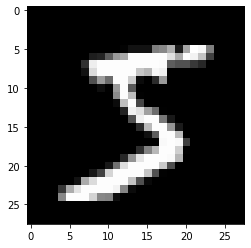

In [0]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('label:', label)

label: 3


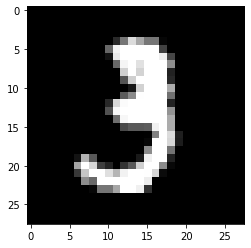

In [0]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('label:', label)

In [0]:
import torchvision.transforms as transforms

In [0]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [0]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [0]:
print(img_tensor[:,10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


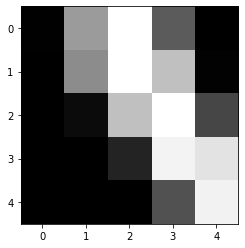

In [0]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [0]:
img_tensor[:,10:15,10:15]

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])

In [0]:
import numpy as np

def split_indices(n, val_pct):
  # determine size of validation set
  n_val = int(n*val_pct)
  # create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  # pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]

In [0]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [0]:
print(len(train_indices), len(val_indices))
print('sample val indices:', val_indices[:20])

48000 12000
sample val indices: [27460 53122 28763 28855 50552 39141 53861 41807  9251 19050  2173 20244
 23480  4579 40948 53243 34093 33914 15532  5222]


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size = 100

# training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

# validation sampler and data loader 
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [0]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [0]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0354, -0.0197, -0.0084,  ..., -0.0067, -0.0144,  0.0321],
        [ 0.0150,  0.0079,  0.0124,  ...,  0.0282,  0.0111,  0.0159],
        [-0.0098, -0.0192,  0.0141,  ...,  0.0054,  0.0077, -0.0228],
        ...,
        [ 0.0118,  0.0117,  0.0054,  ...,  0.0290,  0.0144,  0.0231],
        [ 0.0222,  0.0181,  0.0331,  ..., -0.0241,  0.0010,  0.0189],
        [-0.0029, -0.0131, -0.0290,  ..., -0.0240, -0.0147, -0.0347]],
       requires_grad=True)

In [0]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0061,  0.0341,  0.0331, -0.0010,  0.0342, -0.0015,  0.0328,  0.0315,
         0.0141,  0.0260], requires_grad=True)

In [0]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([9, 2, 5, 6, 2, 6, 7, 9, 4, 0, 8, 4, 0, 3, 2, 8, 8, 1, 8, 0, 8, 0, 4, 4,
        3, 4, 4, 4, 5, 8, 6, 0, 3, 5, 9, 2, 9, 3, 6, 0, 0, 3, 1, 6, 4, 2, 8, 9,
        2, 3, 0, 8, 3, 7, 6, 1, 6, 9, 2, 3, 3, 5, 9, 0, 8, 9, 1, 0, 0, 6, 1, 9,
        8, 2, 1, 2, 2, 7, 0, 7, 9, 7, 5, 2, 1, 2, 5, 6, 7, 0, 6, 9, 0, 7, 8, 2,
        3, 8, 5, 4])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [0]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
model = MnistModel()

In [0]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0214,  0.0277,  0.0047,  ...,  0.0238, -0.0026, -0.0289],
         [ 0.0025, -0.0066,  0.0260,  ..., -0.0198,  0.0306, -0.0097],
         [-0.0066, -0.0067,  0.0279,  ...,  0.0158,  0.0252, -0.0189],
         ...,
         [-0.0256,  0.0069,  0.0045,  ...,  0.0085,  0.0209,  0.0282],
         [-0.0040,  0.0142, -0.0180,  ...,  0.0288, -0.0248,  0.0260],
         [ 0.0337,  0.0059, -0.0154,  ...,  0.0230, -0.0161, -0.0100]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0097, -0.0181,  0.0017,  0.0020,  0.0194, -0.0312, -0.0234, -0.0053,
         -0.0311, -0.0166], requires_grad=True)]

In [0]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)


outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.2577,  0.6350,  0.2836,  0.2017,  0.1092,  0.0618,  0.0220, -0.1974,
         -0.1063,  0.6815],
        [ 0.1829,  0.1587, -0.1118,  0.0809,  0.0439, -0.1797,  0.1080,  0.0859,
          0.0486,  0.1580]])


In [0]:
outputs[:2].data

tensor([[ 0.2577,  0.6350,  0.2836,  0.2017,  0.1092,  0.0618,  0.0220, -0.1974,
         -0.1063,  0.6815],
        [ 0.1829,  0.1587, -0.1118,  0.0809,  0.0439, -0.1797,  0.1080,  0.0859,
          0.0486,  0.1580]])

In [0]:
import torch.nn.functional as F


In [0]:
# apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# look at sample probs
print('sample probs:\n', probs[:2].data)

#add up the probs of an output row
print('sum:', torch.sum(probs[0]).item())

sample probs:
 tensor([[0.1024, 0.1494, 0.1051, 0.0969, 0.0883, 0.0842, 0.0809, 0.0650, 0.0712,
         0.1565],
        [0.1127, 0.1100, 0.0839, 0.1018, 0.0981, 0.0784, 0.1045, 0.1023, 0.0985,
         0.1099]])
sum: 1.0


In [0]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1565, 0.1127, 0.1541, 0.1300, 0.1391, 0.1384, 0.1230, 0.1367, 0.1228,
        0.1452, 0.1410, 0.1377, 0.1305, 0.1666, 0.1452, 0.1393, 0.1306, 0.1508,
        0.1201, 0.1542, 0.1592, 0.1152, 0.1215, 0.1486, 0.1282, 0.1494, 0.1189,
        0.1307, 0.1520, 0.1222, 0.1494, 0.1411, 0.1451, 0.1201, 0.1129, 0.1286,
        0.1587, 0.1323, 0.1389, 0.1376, 0.1528, 0.1249, 0.1464, 0.1659, 0.1162,
        0.1726, 0.1353, 0.1615, 0.1167, 0.1371, 0.1534, 0.1189, 0.1515, 0.1503,
        0.1461, 0.1365, 0.1555, 0.1707, 0.1326, 0.1141, 0.1485, 0.1365, 0.1186,
        0.1299, 0.1597, 0.1189, 0.1266, 0.1127, 0.1761, 0.1413, 0.1506, 0.1155,
        0.1092, 0.1172, 0.1181, 0.1145, 0.1297, 0.1364, 0.1414, 0.1497, 0.1404,
        0.1297, 0.1811, 0.1132, 0.1546, 0.1359, 0.1291, 0.1534, 0.1540, 0.1862,
        0.1456, 0.1287, 0.1460, 0.1701, 0.1207, 0.1217, 0.1385, 0.1789, 0.1321,
        0.1228], grad_fn=<MaxBackward0>)
tensor([9, 0, 9, 9, 9, 9, 9, 9, 1, 2, 9, 9, 1, 9, 9, 9, 2, 1, 9, 1, 1, 0, 7, 1,

In [0]:
def accuracy(l1, l2):
  return torch.sum(l1==l2).item()/len(l1)


In [0]:
accuracy(preds, labels)

0.05

In [0]:
outputs.shape

torch.Size([100, 10])

In [0]:
labels.shape

torch.Size([100])

In [0]:
loss_fn = F.cross_entropy

loss = loss_fn(probs, labels)
print(loss)

tensor(2.3036, grad_fn=<NllLossBackward>)


In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)
  
  return loss.item(), len(xb), metric_result


In [0]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb,yb in valid_dl]

    losses, nums, metrics = zip(*results)
    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums))/ total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums))/total
  return avg_loss, total, avg_metric



In [0]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds== labels).item()/len(preds)

In [0]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('loss: {:.4f}, accuracy: {:.4f}' .format(val_loss, val_acc))

loss: 2.3294, accuracy: 0.0731


In [0]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    for xb, yb in train_dl:
      loss, _,_ = loss_batch(model, loss_fn, xb, yb, opt)
    
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    if metric is None:
      print('epoch[{}/{}], loss:{:.4f}'.format(epoch+1), epochs, val_loss)
    else:
      print('epoch[{}/{}], loss:{:.4f}, {}, {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))


In [0]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [0]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

epoch[1/5], loss:1.5896, accuracy, 0.7502
epoch[2/5], loss:1.3770, accuracy, 0.7772
epoch[3/5], loss:1.2239, accuracy, 0.7956
epoch[4/5], loss:1.1105, accuracy, 0.8079
epoch[5/5], loss:1.0237, accuracy, 0.8163


In [0]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

epoch[1/5], loss:0.9555, accuracy, 0.8227
epoch[2/5], loss:0.9006, accuracy, 0.8284
epoch[3/5], loss:0.8553, accuracy, 0.8329
epoch[4/5], loss:0.8173, accuracy, 0.8366
epoch[5/5], loss:0.7850, accuracy, 0.8390


In [0]:
fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

epoch[1/10], loss:0.7572, accuracy, 0.8427
epoch[2/10], loss:0.7329, accuracy, 0.8452
epoch[3/10], loss:0.7116, accuracy, 0.8473
epoch[4/10], loss:0.6926, accuracy, 0.8496
epoch[5/10], loss:0.6756, accuracy, 0.8513
epoch[6/10], loss:0.6604, accuracy, 0.8529
epoch[7/10], loss:0.6466, accuracy, 0.8538
epoch[8/10], loss:0.6340, accuracy, 0.8555
epoch[9/10], loss:0.6224, accuracy, 0.8573
epoch[10/10], loss:0.6118, accuracy, 0.8584


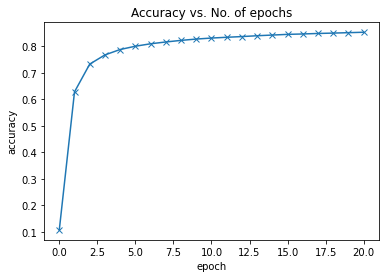

In [0]:
# Replace these values with your results
accuracies = [0.1076, 0.6282, 0.7329, 0.7675, 0.7879, 0.8003,
              0.8095, 0.8163, 0.8223, 0.8273, 0.8311, 
              0.8340, 0.8367, 0.8398, 0.8424, 0.8450,
              0.8465, 0.8484, 0.8498, 0.8514, 0.8530]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [0]:
!pip install jovian --upgrade

     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=184e15c24c894ec2a2e007b20ca86da0dc6f63033fb25737fc5da1cd4f0d1f2f
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [0]:
import jovian

jovian.log_hyperparams({
    'opt': 'SGD',
    'lr': 0.001,
    'batch_size': 100,
    'arch': 'logistic-regression'
})

[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Hyperparams logged.


In [0]:
jovian.log_metrics({
    'val_loss': 1.1057,
    'val_acc': 0.8038
})

[jovian] Metrics logged.


In [0]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

shape: torch.Size([1, 28, 28])
label: 7


torch.Size([28, 28])

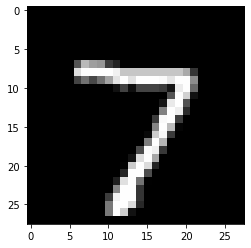

In [0]:
img, label = test_dataset[0]

plt.imshow(img[0], cmap='gray')
print('shape:', img.shape)
print('label:', label)
img[0].shape

In [0]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

label: 7 , predicted: 7


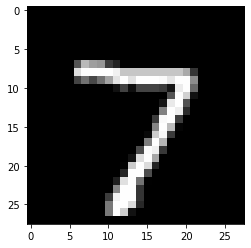

In [0]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('label:', label, ', predicted:', predict_image(img, model))

In [0]:
jovian.log_metrics({
    'test_loss': 1.0796,
    'test_acc': 0.8217
})

[jovian] Metrics logged.


In [0]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [0]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0103,  0.0245, -0.0231,  ..., -0.0183, -0.0299,  0.0042],
                      [ 0.0106,  0.0040, -0.0180,  ...,  0.0258, -0.0206, -0.0012],
                      [-0.0012,  0.0054,  0.0020,  ..., -0.0235,  0.0089, -0.0124],
                      ...,
                      [-0.0340,  0.0052, -0.0315,  ...,  0.0115,  0.0101, -0.0130],
                      [-0.0339,  0.0116,  0.0240,  ..., -0.0138, -0.0257, -0.0208],
                      [ 0.0225,  0.0200, -0.0070,  ..., -0.0066, -0.0354,  0.0297]])),
             ('linear.bias',
              tensor([-0.0807,  0.1310, -0.0586,  0.0041,  0.0001,  0.0540,  0.0163,  0.0319,
                      -0.1317, -0.0086]))])

In [0]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0103,  0.0245, -0.0231,  ..., -0.0183, -0.0299,  0.0042],
                      [ 0.0106,  0.0040, -0.0180,  ...,  0.0258, -0.0206, -0.0012],
                      [-0.0012,  0.0054,  0.0020,  ..., -0.0235,  0.0089, -0.0124],
                      ...,
                      [-0.0340,  0.0052, -0.0315,  ...,  0.0115,  0.0101, -0.0130],
                      [-0.0339,  0.0116,  0.0240,  ..., -0.0138, -0.0257, -0.0208],
                      [ 0.0225,  0.0200, -0.0070,  ..., -0.0066, -0.0354,  0.0297]])),
             ('linear.bias',
              tensor([-0.0807,  0.1310, -0.0586,  0.0041,  0.0001,  0.0540,  0.0163,  0.0319,
                      -0.1317, -0.0086]))])

In [0]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5837, Accuracy: 0.8715


In [0]:
import jovian

In [0]:
jovian.commit(outputs=['mnist-logistic.pth'])

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..
